In [1]:
import cobra
import numpy as np
from cobra import *
import os
import matplotlib.pyplot as plt
import pickle
from tools import report_model_status

In [2]:
ecpy_path = '../../../ecpy/'
sys.path.append(os.path.abspath(ecpy_path))
import utils
import ecpy

In [3]:
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/gangl/Documents/GitHub/Halo-GEM/ecpy/utils.py'>

In [4]:
infiles = [
    #'../Results/halo_metacycmodel_100_curated_compart_with_eco_medium_biomass_gapfilled_PHA_NGAM.pkl',
    # '../Results/halo_metacyc_kegg_curated_compart_with_eco_medium_biomass_gapfilled_PHA_NGAM.pkl',
    '../Results/halo_metacycmodel_100_curated_compart_with_eco_without_missing_medium_biomass_gapfilled_PHA_NGAM.pkl',
     #'../Results/halo_metacyc_kegg_curated_compart_with_eco_without_missing_medium_biomass_gapfilled_PHA_NGAM.pkl'
]
tags = [
    #'WithMissingGene_Metacyc',
    #'WithMissingGene_Metacyc_KEGG',
    'WithoutMissingGene_Metacyc',
    #'WithoutMissingGene_Metacyc_KEGG',
]

#### 1. Test the effect of glucose uptake
NGAM = 6.86

In [5]:
def test_glc_uptake_on_growth(model_file,tag):
    #print(model_file)
    halo_model = pickle.load(open(model_file,'rb'))
    print()
    print(tag)
    report_model_status(halo_model)
    
    print('NGAM:',halo_model.reactions.NGAM.lower_bound)
    print(utils.test_biomass_production(halo_model))
    utils.test_glucose(halo_model)

Using license file /Users/gangl/gurobi.lic
Academic license - for non-commercial use only
Read LP format model from file /var/folders/dx/ghtq02dx2w307xx_5hncb421qny3_w/T/tmp1b8sodag.lp
Reading time = 0.04 seconds
: 2339 rows, 4538 columns, 21378 nonzeros

WithoutMissingGene_Metacyc
Number of reactions: 2269
Number of metabolits: 2339
Number of compartments: 3 {'c': '', 'p': '', 'e': ''}
Number of genes: 1358
Number of missing genes: 5
Number of reactions with missing genes: 3

NGAM: 6.86


cobra/util/solver.py:416 UserWarning: solver status is 'infeasible'


(<Solution infeasible at 0x1327c2d278>, <Solution 1.342 at 0x1327c2d630>)


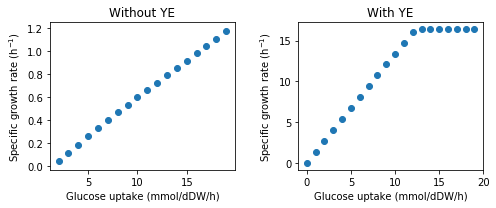

In [6]:
for i,infile in enumerate(infiles):test_glc_uptake_on_growth(infile,tags[i])

#### 2. test the effect of NGAM
Fix glucose uptake rate as 10.0

In [7]:
def test_NGAM_on_growth(model_file,tag):
    halo_model = pickle.load(open(model_file,'rb'))
    utils.set_bound(halo_model,'Exchange_Glucopyranose',ub=10.0)
    print()
    print(tag)
    print(utils.test_biomass_production(halo_model))
    utils.test_NGAM(halo_model)


Read LP format model from file /var/folders/dx/ghtq02dx2w307xx_5hncb421qny3_w/T/tmpe52oobkz.lp
Reading time = 0.02 seconds
: 2339 rows, 4538 columns, 21378 nonzeros

WithoutMissingGene_Metacyc
(<Solution 0.598 at 0x1327dae860>, <Solution 13.419 at 0x1327dae160>)


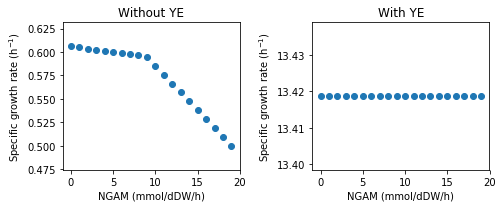

In [8]:
for i,infile in enumerate(infiles):test_NGAM_on_growth(infile,tags[i])

#### 4. PHA production

In [9]:
def test_PHA_on_growth(model_file,tag):
    halo_model = pickle.load(open(model_file,'rb'))
    utils.set_bound(halo_model,'Exchange_Glucopyranose',ub=10.0)
    print()
    print(tag)
    print(utils.test_biomass_production(halo_model))
    utils.test_PHA(halo_model,ys=np.arange(0,20))

Read LP format model from file /var/folders/dx/ghtq02dx2w307xx_5hncb421qny3_w/T/tmp5c0_yhvu.lp
Reading time = 0.03 seconds
: 2339 rows, 4538 columns, 21378 nonzeros

WithoutMissingGene_Metacyc
(<Solution 0.598 at 0x13284b7940>, <Solution 13.419 at 0x1327e7e208>)


cobra/util/solver.py:416 UserWarning: solver status is 'infeasible'


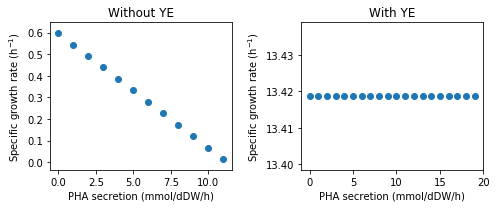

In [10]:
for i,infile in enumerate(infiles):test_PHA_on_growth(infile,tags[i])

#### 5. Test ATP production 

In [11]:
def test_glc_on_atp_sink(model_file,tag):
    halo_model = pickle.load(open(model_file,'rb'))
    print()
    print(tag)
    print('NGAM:',halo_model.reactions.NGAM.lower_bound)
    print(utils.test_biomass_production(halo_model))
    
    utils.set_bound(halo_model,'NGAM',eq=0)
    print('NGAM:',halo_model.reactions.NGAM.lower_bound)
    print(utils.test_biomass_production(halo_model))

    utils.test_Glc_to_ATP(halo_model)
    del halo_model

Read LP format model from file /var/folders/dx/ghtq02dx2w307xx_5hncb421qny3_w/T/tmpi7cv6jx4.lp
Reading time = 0.02 seconds
: 2339 rows, 4538 columns, 21378 nonzeros

WithoutMissingGene_Metacyc
NGAM: 6.86


cobra/util/solver.py:416 UserWarning: solver status is 'infeasible'


(<Solution infeasible at 0x1328a0bf28>, <Solution 1.342 at 0x1328a0b320>)
NGAM: 0
(<Solution 0.031 at 0x1328a0bf28>, <Solution 1.342 at 0x1328a0ba90>)


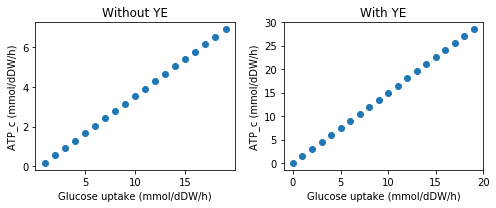

In [12]:
for i,infile in enumerate(infiles):test_glc_on_atp_sink(infile,tags[i])

#### Test NGAM maximization

In [13]:
def tset_glc_on_NGAM(model_file,tag):
    halo_model = pickle.load(open(model_file,'rb'))
    print()
    print(tag)
    print(utils.test_biomass_production(halo_model))
    utils.test_Glc_to_NGAM(halo_model)
    del halo_model

Read LP format model from file /var/folders/dx/ghtq02dx2w307xx_5hncb421qny3_w/T/tmpt5jq5g9c.lp
Reading time = 0.03 seconds
: 2339 rows, 4538 columns, 21378 nonzeros

WithoutMissingGene_Metacyc


cobra/util/solver.py:416 UserWarning: solver status is 'infeasible'


(<Solution infeasible at 0x132831a048>, <Solution 1.342 at 0x132831aac8>)
[[-27.44, 718.7922222222222], [4.069999999999993, 718.9588888888889], [11.569999999999993, 719.1255555555559], [19.069999999999993, 719.2922222222222], [26.570000000001713, 719.4588888888894], [34.069999999999936, 719.6255555555556], [41.56999999999969, 719.7922222222221], [49.06999999999971, 719.9588888888889], [56.569999999999936, 720.1255555555555], [64.06999999999994, 720.2922222222222], [71.56999999999971, 720.4588888888889], [79.07000000000006, 720.6255555555558], [86.57000000000171, 720.7922222222222], [94.07000000000174, 720.9588888888889], [101.56999999999833, 721.1255555555556], [109.06999999999994, 721.2922222222222], [116.56999999999991, 721.458888888889], [124.06999999999971, 721.6255555555556], [131.56999999999985, 721.7922222222221], [139.06999999999994, 721.9588888888889]]


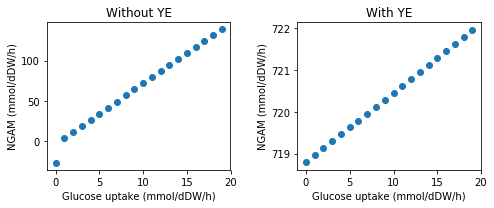

In [14]:
for i,infile in enumerate(infiles):tset_glc_on_NGAM(infile,tags[i])

#### Test case in ecoli model

In [15]:
eco_model = cobra.io.read_sbml_model('../../../ComplementaryData/iML1515.xml')

[0.0, 23.50000000000003, 47.00000000000005, 70.50000000000009, 94.0000000000001, 117.5000000000001, 141.00000000000017, 164.50000000000017, 188.0000000000002, 211.5000000000002, 235.0000000000002, 258.50000000000034, 282.00000000000034, 305.5000000000003, 329.00000000000034, 352.5000000000004, 376.0000000000004, 399.5000000000003, 423.0000000000004, 446.5000000000007]


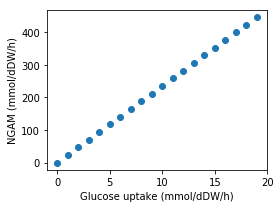

In [16]:
utils.test_Glc_to_NGAM_ecoli(eco_model)

[0.0, 0.5191897654584202, 1.0383795309168404, 1.5575692963752656, 2.076759061833681, 2.595948827292115, 3.1151385927505313, 3.6343283582089616, 4.153518123667362, 4.672707889125785, 5.19189765458423, 5.711087420042645, 6.230277185501063, 6.749466950959519, 7.268656716417923, 7.78784648187635, 8.307036247334723, 8.826226012793192, 9.34541577825157, 9.864605543710047]


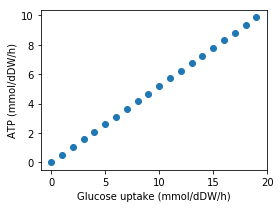

In [17]:
utils.test_Glc_to_ATP_ecoli(eco_model)

#### Choose the one as model_v1

In [18]:
def remove_missing_genes_in_and(gr):
    genes = gr.split('and')
    new_gr = ''
    for item in genes:
        if 'missing' in item: continue
        new_gr += item.strip() + ' and '
    new_gr = new_gr[:-5].strip()
    print('old:',gr)
    print('new:',new_gr)
    print()
    return new_gr

In [19]:
def remove_missing_genes_in_model(model):
    updated_rxns = list()
    for rxn in model.reactions:
        if '_missing' in rxn.gene_reaction_rule:
            print(rxn.id)
            print(rxn.reaction)
            old_gr = rxn.gene_reaction_rule
            new_gr = remove_missing_genes_in_and(old_gr)
            rxn.gene_reaction_rule = new_gr
            rxn.notes['old_gr']= old_gr
        updated_rxns.append(rxn)

    print()
    new_model = cobra.Model('model_v1')
    new_model.add_reactions(updated_rxns)
    report_model_status(new_model)
    return new_model

In [20]:
def save_chosen_one_as_model_v1(choosen_one):
    model = pickle.load(open(choosen_one,'rb'))
    report_model_status(model)
    
    updated_model = remove_missing_genes_in_model(model)
    for met in updated_model.metabolites:
        try: met.charge = int(met.charge)
        except: met.charge=None
    utils.save_model_into_formats(updated_model,'../../../ModelFiles/','Halo_GEM_v1')

In [21]:
choosen_one = '../Results/halo_metacycmodel_100_curated_compart_with_eco_without_missing_medium_biomass_gapfilled_PHA_NGAM.pkl'

In [22]:
save_chosen_one_as_model_v1(choosen_one)

Read LP format model from file /var/folders/dx/ghtq02dx2w307xx_5hncb421qny3_w/T/tmpdpwfct7z.lp
Reading time = 0.02 seconds
: 2339 rows, 4538 columns, 21378 nonzeros
Number of reactions: 2269
Number of metabolits: 2339
Number of compartments: 3 {'c': '', 'p': '', 'e': ''}
Number of genes: 1358
Number of missing genes: 5
Number of reactions with missing genes: 3

SULFITE-REDUCT-RXN
H2SO3_c + 3.0 NADPH_c + 5.0 PROTON_c --> 3.0 CPD-15815_c + CPD-7046_c + 3.0 NADP_c
old: TD01GL001837 and b2764_missing
new: TD01GL001837

K2L4Aabctex
ATP_c + CPD-15815_c + KDO2-LIPID-IVA_p --> ADP_c + CPD-16459_c + KDO2-LIPID-IVA_e + PROTON_c
old: TD01GL000592 and TD01GL000593 and TD01GL002340 and TD01GL002341 and TD01GL002916 and b0641_missing and b3199_missing
new: TD01GL000592 and TD01GL000593 and TD01GL002340 and TD01GL002341 and TD01GL002916

THZPSN3
ATP_c + CPD-12279_c + DEOXYXYLULOSE-5P_c + NADPH_c + PROTON_c + iscssh_c --> AMP_c + CARBON-DIOXIDE_c + 2.0 CPD-15815_c + NADP_c + PPI_c + THZ-P_c + iscs_c
o